In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import pymysql
from collections import Counter

In [2]:
conn = pymysql.connect(host='chamaeleon.konkuk.ac.kr',
                       port = 3306,
                       user = "class_da",
                       password = "dataanalytics",
                       db = "tp_class_da")

cursor_ci = conn.cursor()
cursor_ci.execute("SELECT ci.특허등록번호 as pt_num, ci.인용특허등록연도 as ci_year FROM citation ci")
db_ci = cursor_ci.fetchall()

In [3]:
ci_year_list = []

for pt_num, ci_year in db_ci:
    ci_year_list.append((pt_num, ci_year))
    
ci_dict = {}
for pt_num, ci_year in ci_year_list:
    if ci_dict.get(pt_num):
        ci_dict[pt_num].append(ci_year)
    else :
        ci_dict[pt_num]=[ci_year]

In [4]:
#A ci
cursor_A = conn.cursor()
cursor_A.execute("SELECT ip.특허등록번호 AS num, ip.보유ipc전체코드 AS ip_code FROM tp_class_da.ipc AS ip WHERE ip.보유ipc전체코드 LIKE 'A%'")
db_A = cursor_A.fetchall()

In [5]:
#B ci
cursor_B = conn.cursor()
cursor_B.execute("SELECT ip.특허등록번호 AS num, ip.보유ipc전체코드 AS ip_code FROM tp_class_da.ipc AS ip WHERE ip.보유ipc전체코드 LIKE 'B%'")
db_B = cursor_B.fetchall()

In [6]:
#C ci
cursor_C = conn.cursor()
cursor_C.execute("SELECT ip.특허등록번호 AS num, ip.보유ipc전체코드 AS ip_code FROM tp_class_da.ipc AS ip WHERE ip.보유ipc전체코드 LIKE 'C%'")
db_C = cursor_C.fetchall()

In [7]:
#D ci
cursor_D = conn.cursor()
cursor_D.execute("SELECT ip.특허등록번호 AS num, ip.보유ipc전체코드 AS ip_code FROM tp_class_da.ipc AS ip WHERE ip.보유ipc전체코드 LIKE 'D%'")
db_D = cursor_D.fetchall()

In [8]:
#E ci
cursor_E = conn.cursor()
cursor_E.execute("SELECT ip.특허등록번호 AS num, ip.보유ipc전체코드 AS ip_code FROM tp_class_da.ipc AS ip WHERE ip.보유ipc전체코드 LIKE 'E%'")
db_E = cursor_E.fetchall()

In [9]:
#F ci
cursor_F = conn.cursor()
cursor_F.execute("SELECT ip.특허등록번호 AS num, ip.보유ipc전체코드 AS ip_code FROM tp_class_da.ipc AS ip WHERE ip.보유ipc전체코드 LIKE 'F%'")
db_F = cursor_F.fetchall()

In [10]:
#G ci
cursor_G = conn.cursor()
cursor_G.execute("SELECT ip.특허등록번호 AS num, ip.보유ipc전체코드 AS ip_code FROM tp_class_da.ipc AS ip WHERE ip.보유ipc전체코드 LIKE 'G%'")
db_G = cursor_G.fetchall()

In [31]:
#H ci
cursor_H = conn.cursor()
cursor_H.execute("SELECT ip.특허등록번호 AS num, ip.보유ipc전체코드 AS ip_code FROM tp_class_da.ipc AS ip WHERE ip.보유ipc전체코드 LIKE 'H%'")
db_H = cursor_H.fetchall()

In [11]:
def section_ci_sum(section):
    X_ipc_list = []

    for num, ip_code in section:
        X_ipc_list.append((num, ip_code))
    
    X_dict = {}
    for num, ip_code in X_ipc_list:
        X_dict[num]=[ip_code]
    X_ci_dict = {key:value for key, value in ci_dict.items() if key in X_dict.keys()}
    
    for j in X_ci_dict.keys():
        new_lst = []
        for i in X_ci_dict[j]:
            new_lst.append(int(str(i)[:3] + '0'))
            X_ci_dict[j] = new_lst
    
    year_list = [1850, 1860, 1870, 1880, 1890, 1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]

    Xdf = DataFrame(columns = year_list ,index = X_ci_dict.keys())
    
    for i in X_ci_dict.keys():
        for j in year_list:
            Xdf.at[i, j] = Counter(X_ci_dict[i])[j]
    
    sum_list = []
    for i in year_list:
        sum_list.append(Xdf[i].sum())
    new_sum = []
    for j in sum_list:
        j = j / sum(sum_list)
        new_sum.append(j)
    return new_sum

In [32]:
sec_ci = {}
nom_A = []
sec_ci['A'] = section_ci_sum(db_A)
sec_ci['B'] = section_ci_sum(db_B)
sec_ci['C'] = section_ci_sum(db_C)
sec_ci['D'] = section_ci_sum(db_D)
sec_ci['E'] = section_ci_sum(db_E)
sec_ci['F'] = section_ci_sum(db_F)
sec_ci['G'] = section_ci_sum(db_G)
sec_ci['H'] = section_ci_sum(db_H)

In [33]:
year_list = [1850, 1860, 1870, 1880, 1890, 1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
sec_df = pd.DataFrame(data = sec_ci, columns = sec_ci.keys(), index = year_list)

In [34]:
sec_ci_df = sec_df.T

In [35]:
sec_ci_df

,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
A,0.000018,0.000112,0.000168,0.000362,0.000473,0.000768,0.001076,0.001646,0.002299,0.002087,0.004372,0.007581,0.021220,0.051034,0.183201,0.463823,0.259762
B,0.000019,0.000108,0.000277,0.000524,0.000783,0.001132,0.001667,0.002880,0.004457,0.004148,0.008148,0.016324,0.035839,0.066890,0.164830,0.411509,0.280463
C,0.000003,0.000018,0.000057,0.000104,0.000110,0.000201,0.000319,0.000586,0.001225,0.001555,0.003167,0.008382,0.023092,0.050375,0.155349,0.458556,0.296899
D,0.000021,0.000118,0.000343,0.000836,0.000890,0.001276,0.001973,0.003313,0.007162,0.007205,0.011966,0.019750,0.042855,0.070486,0.172076,0.409770,0.249960
E,0.000056,0.000300,0.000783,0.001144,0.001449,0.002617,0.003499,0.006499,0.009384,0.007159,0.013587,0.027435,0.052159,0.083821,0.156955,0.363866,0.269286
F,0.000028,0.000137,0.000359,0.000616,0.000998,0.001425,0.002410,0.003960,0.006073,0.005767,0.010641,0.020154,0.040850,0.073529,0.146653,0.387327,0.299072
G,0.000004,0.000014,0.000023,0.000053,0.000076,0.000173,0.000184,0.000322,0.000546,0.000529,0.001174,0.002468,0.008284,0.025031,0.106821,0.485331,0.368964
H,0.000001,0.000009,0.000015,0.000053,0.000086,0.000158,0.000151,0.000308,0.000561,0.000772,0.001653,0.003097,0.008703,0.023111,0.091996,0.470502,0.398826


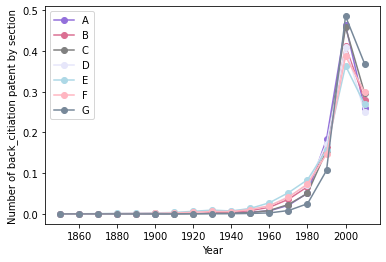

<Figure size 432x288 with 0 Axes>

In [36]:
from matplotlib import pyplot as plt
#x축 : 위에서 정의한 year_list
plotA = section_ci_sum(db_A)
plotB = section_ci_sum(db_B)

plt.plot(year_list, section_ci_sum(db_A), color = "MediumPurple", marker = 'o')
plt.plot(year_list, section_ci_sum(db_B), color = "PaleVioletred", marker = 'o')
plt.plot(year_list, section_ci_sum(db_C), color = "Grey", marker = 'o')
plt.plot(year_list, section_ci_sum(db_D), color = "Lavender", marker = 'o')
plt.plot(year_list, section_ci_sum(db_E), color = "LightBlue", marker = 'o')
plt.plot(year_list, section_ci_sum(db_F), color = "LightPink", marker = 'o')
plt.plot(year_list, section_ci_sum(db_G), color = "LightSlateGray", marker = 'o')


plt.legend(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.xlabel('Year')
plt.ylabel('Number of back_citiation patent by section')
plt.show()
plt.savefig('section_citiation.png')

In [18]:
#k_means clistering

from sklearn.cluster import KMeans

data_points = sec_ci_df.values

kmeans = KMeans(n_clusters=3).fit(data_points)

In [20]:
kmeans.labels_

array([2, 0, 2, 0, 0, 0, 1], dtype=int32)

In [22]:
sec_ci_df['cluster_id'] = kmeans.labels_

In [23]:
sec_ci_df

,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,cluster_id
A,0.000018,0.000112,0.000168,0.000362,0.000473,0.000768,0.001076,0.001646,0.002299,0.002087,0.004372,0.007581,0.021220,0.051034,0.183201,0.463823,0.259762,2
B,0.000019,0.000108,0.000277,0.000524,0.000783,0.001132,0.001667,0.002880,0.004457,0.004148,0.008148,0.016324,0.035839,0.066890,0.164830,0.411509,0.280463,0
C,0.000003,0.000018,0.000057,0.000104,0.000110,0.000201,0.000319,0.000586,0.001225,0.001555,0.003167,0.008382,0.023092,0.050375,0.155349,0.458556,0.296899,2
D,0.000021,0.000118,0.000343,0.000836,0.000890,0.001276,0.001973,0.003313,0.007162,0.007205,0.011966,0.019750,0.042855,0.070486,0.172076,0.409770,0.249960,0
E,0.000056,0.000300,0.000783,0.001144,0.001449,0.002617,0.003499,0.006499,0.009384,0.007159,0.013587,0.027435,0.052159,0.083821,0.156955,0.363866,0.269286,0
F,0.000028,0.000137,0.000359,0.000616,0.000998,0.001425,0.002410,0.003960,0.006073,0.005767,0.010641,0.020154,0.040850,0.073529,0.146653,0.387327,0.299072,0
G,0.000004,0.000014,0.000023,0.000053,0.000076,0.000173,0.000184,0.000322,0.000546,0.000529,0.001174,0.002468,0.008284,0.025031,0.106821,0.485331,0.368964,1


In [30]:
import seaborn as sns
sns.lmplot('x', 'y', data=sec_ci_df, fit_reg = False, scatter_kws={"s":150},
          hue = "clister_id")

plt.title('K_mean cluster_section')

KeyError: "None of [Index(['clister_id', 'x', 'y'], dtype='object')] are in the [columns]"

     |████████████████████████████████| 215 kB 914 kB/s eta 0:00:01
Could not build wheels for numpy, since package 'wheel' is not installed.
Could not build wheels for scipy, since package 'wheel' is not installed.
Could not build wheels for pandas, since package 'wheel' is not installed.
Could not build wheels for matplotlib, since package 'wheel' is not installed.
Could not build wheels for pytz, since package 'wheel' is not installed.
Could not build wheels for python-dateutil, since package 'wheel' is not installed.
Could not build wheels for kiwisolver, since package 'wheel' is not installed.
Could not build wheels for pyparsing, since package 'wheel' is not installed.
Could not build wheels for cycler, since package 'wheel' is not installed.
Could not build wheels for six, since package 'wheel' is not installed.
